In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Circadian

In [8]:
cIHC_metadata = pd.read_csv('../data/CircadianIHC/Metabolome/cIHC_metab_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample-id', 'mouse_number', 'exposure_type', 'zt'], index_col=0)
cIHC_metadata.head()

,zt,exposure_type,mouse_number
sample-id,,,
A32_133_1B,2.0,Air,133.0
A32_133_2B,6.0,Air,133.0
A32_133_3B,10.0,Air,133.0
A32_133_4B,14.0,Air,133.0
A32_133_5B,18.0,Air,133.0


In [9]:
cIHC_wUF_dm = pd.read_csv('../data/CircadianIHC/Metabolome/cIHC_unannotated_rawcounts_noblanks_canberra_dm.tsv', sep='\t', index_col=0)
cIHC_wUF_dm.head()

,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,A25_126_4B,A24_125_6B,A26_127_3B,...,A30_131_5B,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B
A25_126_3B,0.000000,309.882048,320.060550,247.082919,295.508842,300.207034,238.097224,266.858428,287.813680,273.754273,...,331.539187,312.095465,309.769637,316.984967,307.847119,315.170499,293.630935,315.382883,331.137166,352.069883
A24_125_2B,309.882048,0.000000,285.573287,341.048974,349.040979,295.727991,319.394587,306.035326,310.810125,296.429088,...,346.096000,298.564973,327.936594,315.935883,339.949784,318.612122,308.987360,327.337138,327.996324,349.257483
A24_125_4B,320.060550,285.573287,0.000000,315.871396,275.884209,239.406688,304.590116,353.598551,245.082118,324.891400,...,297.128291,292.664465,272.899982,263.293118,286.119584,287.456434,277.514491,292.088089,289.388986,319.579198
A25_126_2B,247.082919,341.048974,315.871396,0.000000,247.866773,277.224674,243.306678,311.056067,294.208076,304.438334,...,321.278363,321.136270,290.817385,290.832778,295.461527,306.706828,296.561460,316.203991,337.522714,331.193080
A25_126_1B,295.508842,349.040979,275.884209,247.866773,0.000000,263.780142,278.719156,348.412468,263.376684,332.232899,...,315.106619,317.666029,261.462262,297.516410,268.380419,303.762269,297.337805,306.127578,315.194042,311.821815


In [10]:
named_cIHC_wUF_dm = pd.merge(cIHC_metadata, cIHC_wUF_dm, left_index=True, right_index=True)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,...,A30_131_5B,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B
A32_133_1B,2.0,Air,133.0,307.847119,339.949784,286.119584,295.461527,268.380419,283.265401,290.261108,...,253.362497,256.339597,252.037914,249.026785,0.000000,243.398950,234.224902,235.789412,238.431133,280.190327
A32_133_2B,6.0,Air,133.0,293.630935,308.987360,277.514491,296.561460,297.337805,283.418906,278.644680,...,268.606221,254.750551,256.583523,246.476025,234.224902,222.077574,0.000000,244.141996,261.833500,310.571470
A32_133_3B,10.0,Air,133.0,305.449228,282.165757,318.039598,337.761768,341.058734,328.449146,306.122344,...,287.175276,277.048728,320.194733,303.423740,314.007698,257.994843,272.855952,296.740486,278.773512,347.331308
A32_133_4B,14.0,Air,133.0,315.170499,318.612122,287.456434,306.706828,303.762269,298.289788,280.331520,...,242.943827,259.554488,266.821825,253.726660,243.398950,0.000000,222.077574,220.047209,224.445768,298.085850
A32_133_5B,18.0,Air,133.0,331.137166,327.996324,289.388986,337.522714,315.194042,291.496486,303.267847,...,228.315399,272.905169,278.594242,268.362991,238.431133,224.445768,261.833500,217.071587,0.000000,274.975291


In [11]:
named_cIHC_wUF_dm['combined'] = named_cIHC_wUF_dm['mouse_number'].map(str) + '_' + named_cIHC_wUF_dm['exposure_type'].map(str) + "_" + named_cIHC_wUF_dm['zt'].map(str)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,...,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B,combined
A32_133_1B,2.0,Air,133.0,307.847119,339.949784,286.119584,295.461527,268.380419,283.265401,290.261108,...,256.339597,252.037914,249.026785,0.000000,243.398950,234.224902,235.789412,238.431133,280.190327,133.0_Air_2.0
A32_133_2B,6.0,Air,133.0,293.630935,308.987360,277.514491,296.561460,297.337805,283.418906,278.644680,...,254.750551,256.583523,246.476025,234.224902,222.077574,0.000000,244.141996,261.833500,310.571470,133.0_Air_6.0
A32_133_3B,10.0,Air,133.0,305.449228,282.165757,318.039598,337.761768,341.058734,328.449146,306.122344,...,277.048728,320.194733,303.423740,314.007698,257.994843,272.855952,296.740486,278.773512,347.331308,133.0_Air_10.0
A32_133_4B,14.0,Air,133.0,315.170499,318.612122,287.456434,306.706828,303.762269,298.289788,280.331520,...,259.554488,266.821825,253.726660,243.398950,0.000000,222.077574,220.047209,224.445768,298.085850,133.0_Air_14.0
A32_133_5B,18.0,Air,133.0,331.137166,327.996324,289.388986,337.522714,315.194042,291.496486,303.267847,...,272.905169,278.594242,268.362991,238.431133,224.445768,261.833500,217.071587,0.000000,274.975291,133.0_Air_18.0


In [12]:
named_cIHC_wUF_dm.drop(columns=['zt', 'exposure_type', 'mouse_number'], inplace=True)

In [13]:
named2_cIHC_wUF_dm = named_cIHC_wUF_dm.set_index('combined')

In [14]:
Named_cIHC_wUF_dm = named_cIHC_wUF_dm[['combined']].copy()
Named_cIHC_wUF_dm.head()

,combined
A32_133_1B,133.0_Air_2.0
A32_133_2B,133.0_Air_6.0
A32_133_3B,133.0_Air_10.0
A32_133_4B,133.0_Air_14.0
A32_133_5B,133.0_Air_18.0


In [15]:
named3_cIHC_wUF_dm = pd.merge(named2_cIHC_wUF_dm.T, Named_cIHC_wUF_dm, left_index=True, right_index=True)
named4_cIHC_wUF_dm = named3_cIHC_wUF_dm.set_index('combined')
named4_cIHC_wUF_dm

,133.0_Air_2.0,133.0_Air_6.0,133.0_Air_10.0,133.0_Air_14.0,133.0_Air_18.0,133.0_Air_22.0,125.0_IHC_2.0,125.0_IHC_6.0,125.0_IHC_14.0,125.0_IHC_18.0,...,131.0_Air_6.0,131.0_Air_14.0,131.0_Air_18.0,131.0_Air_22.0,132.0_Air_2.0,132.0_Air_6.0,132.0_Air_10.0,132.0_Air_14.0,132.0_Air_18.0,132.0_Air_22.0
combined,,,,,,,,,,,,,,,,,,,,,
126.0_IHC_10.0,307.847119,293.630935,305.449228,315.170499,331.137166,315.382883,363.531485,309.882048,320.060550,300.207034,...,312.981838,304.526057,331.539187,352.069883,309.769637,306.691318,316.984967,332.035701,315.511021,312.095465
125.0_IHC_6.0,339.949784,308.987360,282.165757,318.612122,327.996324,327.337138,334.056057,0.000000,285.573287,295.727991,...,324.114745,303.814051,346.096000,349.257483,327.936594,293.384610,315.935883,310.563791,289.612825,298.564973
125.0_IHC_14.0,286.119584,277.514491,318.039598,287.456434,289.388986,292.088089,273.581545,285.573287,0.000000,239.406688,...,277.845298,288.235862,297.128291,319.579198,272.899982,276.034015,263.293118,273.295749,283.008181,292.664465
126.0_IHC_6.0,295.461527,296.561460,337.761768,306.706828,337.522714,316.203991,328.920149,341.048974,315.871396,277.224674,...,306.112800,316.219689,321.278363,331.193080,290.817385,299.684893,290.832778,323.689778,324.662444,321.136270
126.0_IHC_2.0,268.380419,297.337805,341.058734,303.762269,315.194042,306.127578,293.662713,349.040979,275.884209,263.780142,...,304.517680,309.432743,315.106619,311.821815,261.462262,300.822156,297.516410,304.317898,329.209873,317.666029
125.0_IHC_18.0,283.265401,283.418906,328.449146,298.289788,291.496486,290.033072,309.768972,295.727991,239.406688,0.000000,...,277.565021,295.029905,293.307265,312.894588,264.813291,268.694530,267.032904,276.667400,294.273044,302.377231
127.0_IHC_6.0,290.261108,278.644680,306.122344,280.331520,303.267847,284.180779,339.674138,319.394587,304.590116,289.606099,...,283.160980,284.426653,305.448375,338.075954,298.101480,285.507930,287.811693,310.840373,307.201069,302.646473
126.0_IHC_14.0,335.589085,314.972169,277.542892,308.886221,335.734563,337.708081,409.831070,306.035326,353.598551,340.206052,...,318.734322,309.269157,325.991825,387.053407,352.913989,313.075492,336.840053,337.781501,305.353329,316.757045
125.0_IHC_22.0,263.948209,264.527633,311.620690,288.691771,283.256971,292.349740,315.899333,310.810125,245.082118,225.981027,...,270.971012,266.380891,280.937680,315.849503,267.951274,258.140367,277.879831,264.674105,288.284808,284.730665


In [16]:
named5_cIHC_wUF_dm = named4_cIHC_wUF_dm.filter(regex='IHC')
named6_cIHC_wUF_dm = named5_cIHC_wUF_dm.T.filter(regex='Air')
named6_cIHC_wUF_dm.shape

(23, 23)

In [17]:
wufdm = named6_cIHC_wUF_dm.copy()
wufdm2 = wufdm.stack().reset_index()
wufdm2.columns = ['IHC','Air','Value']
wufdm2

,IHC,Air,Value
0,125.0_IHC_2.0,130.0_Air_2.0,337.528341
1,125.0_IHC_2.0,130.0_Air_22.0,383.515321
2,125.0_IHC_2.0,130.0_Air_10.0,342.393576
3,125.0_IHC_2.0,130.0_Air_6.0,365.660430
4,125.0_IHC_2.0,131.0_Air_2.0,335.958222
...,...,...,...
524,128.0_IHC_22.0,133.0_Air_14.0,277.418453
525,128.0_IHC_22.0,133.0_Air_6.0,276.355389
526,128.0_IHC_22.0,133.0_Air_22.0,258.096231
527,128.0_IHC_22.0,133.0_Air_18.0,281.565878


In [18]:
wufdm2['timepoints'] = wufdm2['IHC'].str.split('_').str[-1] + "_" + wufdm2['Air'].str.split('_').str[-1]
wufdm2.timepoints.unique()

array(['2.0_2.0', '2.0_22.0', '2.0_10.0', '2.0_6.0', '2.0_14.0',
       '2.0_18.0', '6.0_2.0', '6.0_22.0', '6.0_10.0', '6.0_6.0',
       '6.0_14.0', '6.0_18.0', '14.0_2.0', '14.0_22.0', '14.0_10.0',
       '14.0_6.0', '14.0_14.0', '14.0_18.0', '18.0_2.0', '18.0_22.0',
       '18.0_10.0', '18.0_6.0', '18.0_14.0', '18.0_18.0', '22.0_2.0',
       '22.0_22.0', '22.0_10.0', '22.0_6.0', '22.0_14.0', '22.0_18.0',
       '10.0_2.0', '10.0_22.0', '10.0_10.0', '10.0_6.0', '10.0_14.0',
       '10.0_18.0'], dtype=object)

In [20]:
zt_tps = ['2.0_2.0', '6.0_6.0', '10.0_10.0', '14.0_14.0', '18.0_18.0', '22.0_22.0']

In [21]:
wufdm2['mice'] = wufdm2['IHC'].str.split('_').str[0] + "_" + wufdm2['Air'].str.split('_').str[0]
wufdm2.mice.unique()

array(['125.0_130.0', '125.0_131.0', '125.0_132.0', '125.0_133.0',
       '126.0_130.0', '126.0_131.0', '126.0_132.0', '126.0_133.0',
       '127.0_130.0', '127.0_131.0', '127.0_132.0', '127.0_133.0',
       '128.0_130.0', '128.0_131.0', '128.0_132.0', '128.0_133.0'],
      dtype=object)

In [22]:
combos = ['125.0_130.0', '125.0_131.0', '125.0_132.0', '125.0_133.0',
       '126.0_130.0', '126.0_131.0', '126.0_132.0', '126.0_133.0',
       '127.0_130.0', '127.0_131.0', '127.0_132.0', '127.0_133.0',
       '128.0_130.0', '128.0_131.0', '128.0_132.0', '128.0_133.0']

In [23]:
wufdm3 = wufdm2.loc[wufdm2['timepoints'].isin(zt_tps)]
wufdm3

,IHC,Air,Value,timepoints,mice
0,125.0_IHC_2.0,130.0_Air_2.0,337.528341,2.0_2.0,125.0_130.0
4,125.0_IHC_2.0,131.0_Air_2.0,335.958222,2.0_2.0,125.0_131.0
15,125.0_IHC_2.0,132.0_Air_2.0,304.467653,2.0_2.0,125.0_132.0
17,125.0_IHC_2.0,133.0_Air_2.0,299.734054,2.0_2.0,125.0_133.0
26,125.0_IHC_6.0,130.0_Air_6.0,305.721954,6.0_6.0,125.0_130.0
...,...,...,...,...,...
504,128.0_IHC_18.0,133.0_Air_18.0,255.249193,18.0_18.0,128.0_133.0
507,128.0_IHC_22.0,130.0_Air_22.0,286.258781,22.0_22.0,128.0_130.0
520,128.0_IHC_22.0,132.0_Air_22.0,258.746653,22.0_22.0,128.0_132.0
526,128.0_IHC_22.0,133.0_Air_22.0,258.096231,22.0_22.0,128.0_133.0


In [24]:
wufdm4 = wufdm3.copy()
wufdm4['ZT'] = wufdm4['timepoints'].str.split('_').str[-1]
wufdm4['Controls'] = wufdm4['Air'].str.split('_').str[0]
wufdm4['Experimentals'] = wufdm4['IHC'].str.split('_').str[0]
wufdm4

,IHC,Air,Value,timepoints,mice,ZT,Controls,Experimentals
0,125.0_IHC_2.0,130.0_Air_2.0,337.528341,2.0_2.0,125.0_130.0,2.0,130.0,125.0
4,125.0_IHC_2.0,131.0_Air_2.0,335.958222,2.0_2.0,125.0_131.0,2.0,131.0,125.0
15,125.0_IHC_2.0,132.0_Air_2.0,304.467653,2.0_2.0,125.0_132.0,2.0,132.0,125.0
17,125.0_IHC_2.0,133.0_Air_2.0,299.734054,2.0_2.0,125.0_133.0,2.0,133.0,125.0
26,125.0_IHC_6.0,130.0_Air_6.0,305.721954,6.0_6.0,125.0_130.0,6.0,130.0,125.0
...,...,...,...,...,...,...,...,...
504,128.0_IHC_18.0,133.0_Air_18.0,255.249193,18.0_18.0,128.0_133.0,18.0,133.0,128.0
507,128.0_IHC_22.0,130.0_Air_22.0,286.258781,22.0_22.0,128.0_130.0,22.0,130.0,128.0
520,128.0_IHC_22.0,132.0_Air_22.0,258.746653,22.0_22.0,128.0_132.0,22.0,132.0,128.0
526,128.0_IHC_22.0,133.0_Air_22.0,258.096231,22.0_22.0,128.0_133.0,22.0,133.0,128.0


In [25]:
wufdm4.Value.mean()

288.8620464980863

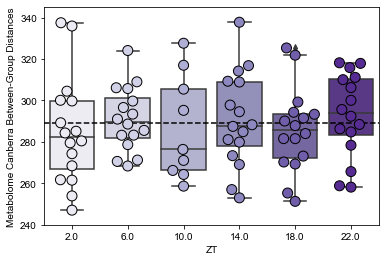

In [34]:
ax = sns.boxplot(x="ZT", y="Value", palette="Purples",
                 data=wufdm4, order=['2.0', '6.0', '10.0', '14.0', '18.0', '22.0'])
ax = sns.swarmplot(x="ZT", y="Value", palette="Purples", edgecolor='k', linewidth=1, size=10,
                   data=wufdm4, order=['2.0', '6.0', '10.0', '14.0', '18.0', '22.0'])
plt.ylabel('Metabolome Canberra Between-Group Distances')
ax.axhline(288.8620464980863, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_canberra_dist_boxplot.svg', dpi=300, bbox_inches="tight")

In [28]:
from scipy.stats import wilcoxon

In [29]:
from itertools import combinations

In [30]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].Value.values
    y = wufdm4[wufdm4["ZT"] == key[1]].Value.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        t = set(wufdm4[wufdm4["ZT"] == key[0]].mice)
        w = set(wufdm4[wufdm4["ZT"] == key[1]].mice)
        q = list(t.intersection(w))
        
        newdf = wufdm4.loc[wufdm4['mice'].isin(q)]
        
        xx = newdf[newdf["ZT"] == key[0]].Value.values
        yy = newdf[newdf["ZT"] == key[1]].Value.values
        
        w, p = wilcoxon(xx, yy)
        print("Combination", key)
        print(p, w)
        print("____________________")
#significant combinations = None

Combination ('2.0', '6.0')
0.27753025059514513 47.0
____________________
Combination ('2.0', '14.0')
0.5349252131384397 56.0
____________________
Combination ('2.0', '18.0')
0.7959872153886274 63.0
____________________
Combination ('2.0', '22.0')
0.3010541816225988 48.0
____________________
Combination ('2.0', '10.0')
0.3742593192802244 15.0
____________________
Combination ('6.0', '14.0')
0.7959872153886274 63.0
____________________
Combination ('6.0', '18.0')
0.23432097173768163 45.0
____________________
Combination ('6.0', '22.0')
0.6416601266046645 59.0
____________________
Combination ('6.0', '10.0')
0.9527650219907529 22.0
____________________
Combination ('14.0', '18.0')
0.9176315934670087 66.0
____________________
Combination ('14.0', '22.0')
0.40804420568711997 52.0
____________________
Combination ('14.0', '10.0')
0.5939546753269146 18.0
____________________
Combination ('18.0', '22.0')
0.35197884167136195 50.0
____________________
Combination ('18.0', '10.0')
0.8589549227374

/opt/anaconda3/envs/qiime2-2019.10/lib/python3.6/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [32]:
from scipy.stats import mannwhitneyu

In [33]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].Value.values
    y = wufdm4[wufdm4["ZT"] == key[1]].Value.values
    if len(x) == len(y):
        w, p = mannwhitneyu(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
#none significant

Combination ('2.0', '6.0')
0.14999723533861226 100.0
____________________
Combination ('2.0', '14.0')
0.19821880252408136 105.0
____________________
Combination ('2.0', '18.0')
0.4032367455287309 121.0
____________________
Combination ('2.0', '22.0')
0.11030836498707358 95.0
____________________
Combination ('6.0', '14.0')
0.4924825934640977 128.0
____________________
Combination ('6.0', '18.0')
0.1878924138405797 104.0
____________________
Combination ('6.0', '22.0')
0.292364816279136 113.0
____________________
Combination ('14.0', '18.0')
0.292364816279136 113.0
____________________
Combination ('14.0', '22.0')
0.292364816279136 113.0
____________________
Combination ('18.0', '22.0')
0.13310711248953133 98.0
____________________


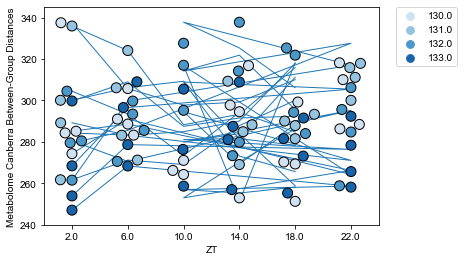

In [35]:
ax = sns.lineplot(x="ZT", y="Value", sort=False,
                  units="mice", lw=1, estimator=None,
                  data=wufdm4)
ax = sns.swarmplot(x="ZT", y="Value", hue="Controls", palette="Blues", edgecolor='k', linewidth=1, size=10,
                   data=wufdm4, order=['2.0', '6.0', '10.0', '14.0', '18.0', '22.0'])
plt.ylabel('Metabolome Canberra Between-Group Distances')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#spaghetti plot

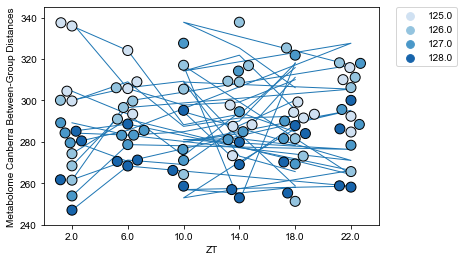

In [36]:
ax = sns.lineplot(x="ZT", y="Value", sort=False,
                  units="mice", lw=1, estimator=None,
                  data=wufdm4)
ax = sns.swarmplot(x="ZT", y="Value", hue="Experimentals", palette="Blues", edgecolor='k', linewidth=1, size=10,
                   data=wufdm4, order=['2.0', '6.0', '10.0', '14.0', '18.0', '22.0'])
plt.ylabel('Metabolome Canberra Between-Group Distances')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Longitudinal

In [54]:
longIHC_metadata = pd.read_csv('../data/longIHC/Metabolome/longIHC_metab_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample-id', 'mouse_number', 'exposure_type', 'host_age'], index_col=0)
longIHC_metadata.head()

,exposure_type,host_age,mouse_number
sample-id,,,
A15_85_01,Air,10.0,85
A15_85_02,Air,10.5,85
A15_85_03,Air,11.0,85
A15_85_04,Air,11.5,85
A15_85_05,Air,12.0,85


In [148]:
longIHC_canberra_dm = pd.read_csv('../data/longIHC/Metabolome/longIHC_unannotated_rawcounts_canberra_HFD_noblanks_nodeadmice_dm.tsv', sep='\t', index_col=0)
longIHC_canberra_dm.head()

,A18_100_20,A18_100_15,A18_100_10,A18_97_10,A18_100_01,A18_100_05,A18_98_10,A18_97_15,A18_97_20,A18_99_20,...,A23_117_01,A23_120_20,A23_118_01,A23_120_10,A23_119_15,A23_120_15,A23_120_01,A23_119_20,A23_120_05,A23_119_01
A18_100_20,0.000000,743.965217,771.862634,778.838816,1323.747268,819.169786,792.335135,807.962838,785.990791,683.884201,...,1394.909049,958.238027,1304.668794,975.013754,984.626666,933.600122,1321.223286,966.168158,1090.673061,1436.587169
A18_100_15,743.965217,0.000000,728.451276,755.519870,1372.671343,835.154310,733.417691,740.889276,800.659760,719.269481,...,1428.776391,1012.395193,1346.688822,980.803862,1031.917336,942.687927,1369.477688,1058.108366,1111.516217,1467.340943
A18_100_10,771.862634,728.451276,0.000000,686.686021,1310.997512,776.760835,657.516359,785.107066,786.718308,782.911589,...,1365.866722,1035.579775,1297.028759,997.158918,1000.307115,1002.401869,1313.571589,1018.305417,1043.830970,1380.693913
A18_97_10,778.838816,755.519870,686.686021,0.000000,1249.630552,793.881035,616.526802,717.236781,767.496787,732.536232,...,1332.124478,1001.232184,1234.965279,932.742391,1065.493869,963.824980,1260.637623,1070.614989,1153.629891,1376.296057
A18_100_01,1323.747268,1372.671343,1310.997512,1249.630552,0.000000,1240.548146,1245.426321,1363.250682,1353.293621,1364.366215,...,746.252689,1432.307575,695.272628,1478.870558,1461.660560,1473.935415,648.818603,1430.178721,1524.181282,965.223873


In [150]:
named_longIHC_canberra_dm = pd.merge(longIHC_metadata, longIHC_canberra_dm, left_index=True, right_index=True)
named_longIHC_canberra_dm.head()

,exposure_type,host_age,mouse_number,A18_100_20,A18_100_15,A18_100_10,A18_97_10,A18_100_01,A18_100_05,A18_98_10,...,A23_117_01,A23_120_20,A23_118_01,A23_120_10,A23_119_15,A23_120_15,A23_120_01,A23_119_20,A23_120_05,A23_119_01
A18_100_01,IHC,10.0,100,1323.747268,1372.671343,1310.997512,1249.630552,0.000000,1240.548146,1245.426321,...,746.252689,1432.307575,695.272628,1478.870558,1461.660560,1473.935415,648.818603,1430.178721,1524.181282,965.223873
A18_100_05,IHC,12.0,100,819.169786,835.154310,776.760835,793.881035,1240.548146,0.000000,752.548263,...,1317.501479,1029.433621,1228.489624,1010.968087,1063.978823,1003.816239,1256.168398,1059.021562,1093.221077,1380.845302
A18_100_10,IHC,14.5,100,771.862634,728.451276,0.000000,686.686021,1310.997512,776.760835,657.516359,...,1365.866722,1035.579775,1297.028759,997.158918,1000.307115,1002.401869,1313.571589,1018.305417,1043.830970,1380.693913
A18_100_15,IHC,17.0,100,743.965217,0.000000,728.451276,755.519870,1372.671343,835.154310,733.417691,...,1428.776391,1012.395193,1346.688822,980.803862,1031.917336,942.687927,1369.477688,1058.108366,1111.516217,1467.340943
A18_100_20,IHC,19.5,100,0.000000,743.965217,771.862634,778.838816,1323.747268,819.169786,792.335135,...,1394.909049,958.238027,1304.668794,975.013754,984.626666,933.600122,1321.223286,966.168158,1090.673061,1436.587169


In [151]:
named_longIHC_canberra_dm['combined'] = named_longIHC_canberra_dm['mouse_number'].map(str) + '_' + named_longIHC_canberra_dm['exposure_type'].map(str) + "_" + named_longIHC_canberra_dm['host_age'].map(str)
named_longIHC_canberra_dm.head()

,exposure_type,host_age,mouse_number,A18_100_20,A18_100_15,A18_100_10,A18_97_10,A18_100_01,A18_100_05,A18_98_10,...,A23_120_20,A23_118_01,A23_120_10,A23_119_15,A23_120_15,A23_120_01,A23_119_20,A23_120_05,A23_119_01,combined
A18_100_01,IHC,10.0,100,1323.747268,1372.671343,1310.997512,1249.630552,0.000000,1240.548146,1245.426321,...,1432.307575,695.272628,1478.870558,1461.660560,1473.935415,648.818603,1430.178721,1524.181282,965.223873,100_IHC_10.0
A18_100_05,IHC,12.0,100,819.169786,835.154310,776.760835,793.881035,1240.548146,0.000000,752.548263,...,1029.433621,1228.489624,1010.968087,1063.978823,1003.816239,1256.168398,1059.021562,1093.221077,1380.845302,100_IHC_12.0
A18_100_10,IHC,14.5,100,771.862634,728.451276,0.000000,686.686021,1310.997512,776.760835,657.516359,...,1035.579775,1297.028759,997.158918,1000.307115,1002.401869,1313.571589,1018.305417,1043.830970,1380.693913,100_IHC_14.5
A18_100_15,IHC,17.0,100,743.965217,0.000000,728.451276,755.519870,1372.671343,835.154310,733.417691,...,1012.395193,1346.688822,980.803862,1031.917336,942.687927,1369.477688,1058.108366,1111.516217,1467.340943,100_IHC_17.0
A18_100_20,IHC,19.5,100,0.000000,743.965217,771.862634,778.838816,1323.747268,819.169786,792.335135,...,958.238027,1304.668794,975.013754,984.626666,933.600122,1321.223286,966.168158,1090.673061,1436.587169,100_IHC_19.5


In [152]:
named_longIHC_canberra_dm.drop(columns=['host_age', 'exposure_type', 'mouse_number'], inplace=True)

In [153]:
named2_longIHC_canberra_dm = named_longIHC_canberra_dm.set_index('combined')

In [154]:
Named_longIHC_canberra_dm = named_longIHC_canberra_dm[['combined']].copy()
Named_longIHC_canberra_dm.head()

,combined
A18_100_01,100_IHC_10.0
A18_100_05,100_IHC_12.0
A18_100_10,100_IHC_14.5
A18_100_15,100_IHC_17.0
A18_100_20,100_IHC_19.5


In [155]:
named3_longIHC_canberra_dm = pd.merge(named2_longIHC_canberra_dm.T, Named_longIHC_canberra_dm, left_index=True, right_index=True)
named4_longIHC_canberra_dm = named3_longIHC_canberra_dm.set_index('combined')
named4_longIHC_canberra_dm

,100_IHC_10.0,100_IHC_12.0,100_IHC_14.5,100_IHC_17.0,100_IHC_19.5,97_IHC_10.0,97_IHC_12.0,97_IHC_14.5,97_IHC_17.0,97_IHC_19.5,...,119_Air_10.0,119_Air_12.0,119_Air_14.5,119_Air_17.0,119_Air_19.5,120_Air_10.0,120_Air_12.0,120_Air_14.5,120_Air_17.0,120_Air_19.5
combined,,,,,,,,,,,,,,,,,,,,,
100_IHC_19.5,1323.747268,819.169786,771.862634,743.965217,0.000000,1364.769964,869.372167,778.838816,807.962838,785.990791,...,1436.587169,1022.169836,1070.674533,984.626666,966.168158,1321.223286,1090.673061,975.013754,933.600122,958.238027
100_IHC_17.0,1372.671343,835.154310,728.451276,0.000000,743.965217,1410.388398,838.532606,755.519870,740.889276,800.659760,...,1467.340943,1012.639973,1032.974101,1031.917336,1058.108366,1369.477688,1111.516217,980.803862,942.687927,1012.395193
100_IHC_14.5,1310.997512,776.760835,0.000000,728.451276,771.862634,1333.770028,743.760914,686.686021,785.107066,786.718308,...,1380.693913,1037.523317,1101.977304,1000.307115,1018.305417,1313.571589,1043.830970,997.158918,1002.401869,1035.579775
97_IHC_14.5,1249.630552,793.881035,686.686021,755.519870,778.838816,1309.265454,742.302159,0.000000,717.236781,767.496787,...,1376.296057,1003.810384,1025.898312,1065.493869,1070.614989,1260.637623,1153.629891,932.742391,963.824980,1001.232184
100_IHC_10.0,0.000000,1240.548146,1310.997512,1372.671343,1323.747268,889.481395,1214.899409,1249.630552,1363.250682,1353.293621,...,965.223873,1455.093427,1453.450663,1461.660560,1430.178721,648.818603,1524.181282,1478.870558,1473.935415,1432.307575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120_Air_17.0,1473.935415,1003.816239,1002.401869,942.687927,933.600122,1531.503627,1082.610606,963.824980,1040.023481,1049.681083,...,1573.782567,827.197547,853.684349,836.472072,858.453905,1478.082184,950.326201,706.591092,0.000000,752.159374
120_Air_10.0,648.818603,1256.168398,1313.571589,1369.477688,1321.223286,962.021349,1250.735750,1260.637623,1377.770765,1380.781701,...,968.853911,1480.028232,1455.280426,1478.471933,1441.108946,0.000000,1544.752026,1496.287441,1478.082184,1439.200149
119_Air_19.5,1430.178721,1059.021562,1018.305417,1058.108366,966.168158,1441.592952,1091.189093,1070.614989,1125.267791,1031.720132,...,1505.731856,937.696424,968.131022,644.651781,0.000000,1441.108946,885.659324,841.540265,858.453905,823.033744


In [156]:
named5_longIHC_canberra_dm = named4_longIHC_canberra_dm.filter(regex='IHC')
named6_longIHC_canberra_dm = named5_longIHC_canberra_dm.T.filter(regex='Air')
named6_longIHC_canberra_dm.shape

(58, 60)

In [157]:
l_wufdm = named6_longIHC_canberra_dm.copy()
l_wufdm2 = l_wufdm.stack().reset_index()
l_wufdm2.columns = ['IHC','Air','Value']
l_wufdm2

,IHC,Air,Value
0,100_IHC_10.0,109_Air_14.5,1511.081098
1,100_IHC_10.0,109_Air_19.5,1413.869501
2,100_IHC_10.0,109_Air_10.0,652.852637
3,100_IHC_10.0,109_Air_12.0,1375.653225
4,100_IHC_10.0,110_Air_19.5,1444.645184
...,...,...,...
3475,108_IHC_19.5,120_Air_17.0,874.939439
3476,108_IHC_19.5,120_Air_10.0,1537.612650
3477,108_IHC_19.5,119_Air_19.5,1025.518640
3478,108_IHC_19.5,120_Air_12.0,1016.531868


In [158]:
l_wufdm2['timepoints'] = l_wufdm2['IHC'].str.split('_').str[-1] + "_" + l_wufdm2['Air'].str.split('_').str[-1]
l_wufdm2.timepoints.unique()

array(['10.0_14.5', '10.0_19.5', '10.0_10.0', '10.0_12.0', '10.0_17.0',
       '12.0_14.5', '12.0_19.5', '12.0_10.0', '12.0_12.0', '12.0_17.0',
       '14.5_14.5', '14.5_19.5', '14.5_10.0', '14.5_12.0', '14.5_17.0',
       '17.0_14.5', '17.0_19.5', '17.0_10.0', '17.0_12.0', '17.0_17.0',
       '19.5_14.5', '19.5_19.5', '19.5_10.0', '19.5_12.0', '19.5_17.0'],
      dtype=object)

In [159]:
l_wufdm2["IHC_timepoint"] = l_wufdm2.IHC.str.split('_').str[-1]
l_wufdm2["Air_timepoint"] = l_wufdm2.Air.str.split('_').str[-1]
l_wufdm3 = l_wufdm2[l_wufdm2.IHC_timepoint == l_wufdm2.Air_timepoint].copy()
l_wufdm3

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint
2,100_IHC_10.0,109_Air_10.0,652.852637,10.0_10.0,10.0,10.0
8,100_IHC_10.0,110_Air_10.0,683.179414,10.0_10.0,10.0,10.0
24,100_IHC_10.0,112_Air_10.0,689.181701,10.0_10.0,10.0,10.0
25,100_IHC_10.0,113_Air_10.0,748.910100,10.0_10.0,10.0,10.0
32,100_IHC_10.0,111_Air_10.0,847.520507,10.0_10.0,10.0,10.0
...,...,...,...,...,...,...
3454,108_IHC_19.5,116_Air_19.5,913.621433,19.5_19.5,19.5,19.5
3458,108_IHC_19.5,118_Air_19.5,940.419602,19.5_19.5,19.5,19.5
3460,108_IHC_19.5,117_Air_19.5,962.336770,19.5_19.5,19.5,19.5
3471,108_IHC_19.5,120_Air_19.5,978.059465,19.5_19.5,19.5,19.5


In [160]:
l_wufdm3['mice'] = l_wufdm3['IHC'].str.split('_').str[0] + "_" + l_wufdm3['Air'].str.split('_').str[0]
l_wufdm3.mice.unique()

array(['100_109', '100_110', '100_112', '100_113', '100_111', '100_115',
       '100_114', '100_116', '100_117', '100_118', '100_120', '100_119',
       '97_109', '97_110', '97_112', '97_113', '97_111', '97_115',
       '97_114', '97_116', '97_117', '97_118', '97_120', '97_119',
       '98_109', '98_110', '98_112', '98_113', '98_111', '98_115',
       '98_114', '98_116', '98_117', '98_118', '98_120', '98_119',
       '99_109', '99_110', '99_112', '99_113', '99_111', '99_115',
       '99_114', '99_116', '99_117', '99_118', '99_120', '99_119',
       '101_109', '101_110', '101_112', '101_113', '101_111', '101_115',
       '101_114', '101_116', '101_117', '101_118', '101_120', '101_119',
       '102_109', '102_110', '102_112', '102_113', '102_111', '102_115',
       '102_114', '102_116', '102_117', '102_118', '102_120', '102_119',
       '103_109', '103_110', '103_112', '103_113', '103_111', '103_115',
       '103_114', '103_116', '103_117', '103_118', '103_120', '103_119',
       '104_10

In [161]:
longcombos = list(l_wufdm3.mice.unique())

In [162]:
l_wufdm4 = l_wufdm3.copy()
l_wufdm4['host_age'] = l_wufdm4['timepoints'].str.split('_').str[-1]
l_wufdm4['Controls'] = l_wufdm4['Air'].str.split('_').str[0]
l_wufdm4['Experimentals'] = l_wufdm4['IHC'].str.split('_').str[0]
l_wufdm4

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint,mice,host_age,Controls,Experimentals
2,100_IHC_10.0,109_Air_10.0,652.852637,10.0_10.0,10.0,10.0,100_109,10.0,109,100
8,100_IHC_10.0,110_Air_10.0,683.179414,10.0_10.0,10.0,10.0,100_110,10.0,110,100
24,100_IHC_10.0,112_Air_10.0,689.181701,10.0_10.0,10.0,10.0,100_112,10.0,112,100
25,100_IHC_10.0,113_Air_10.0,748.910100,10.0_10.0,10.0,10.0,100_113,10.0,113,100
32,100_IHC_10.0,111_Air_10.0,847.520507,10.0_10.0,10.0,10.0,100_111,10.0,111,100
...,...,...,...,...,...,...,...,...,...,...
3454,108_IHC_19.5,116_Air_19.5,913.621433,19.5_19.5,19.5,19.5,108_116,19.5,116,108
3458,108_IHC_19.5,118_Air_19.5,940.419602,19.5_19.5,19.5,19.5,108_118,19.5,118,108
3460,108_IHC_19.5,117_Air_19.5,962.336770,19.5_19.5,19.5,19.5,108_117,19.5,117,108
3471,108_IHC_19.5,120_Air_19.5,978.059465,19.5_19.5,19.5,19.5,108_120,19.5,120,108


In [163]:
l_wufdm4.Value.mean()

949.8267105712325

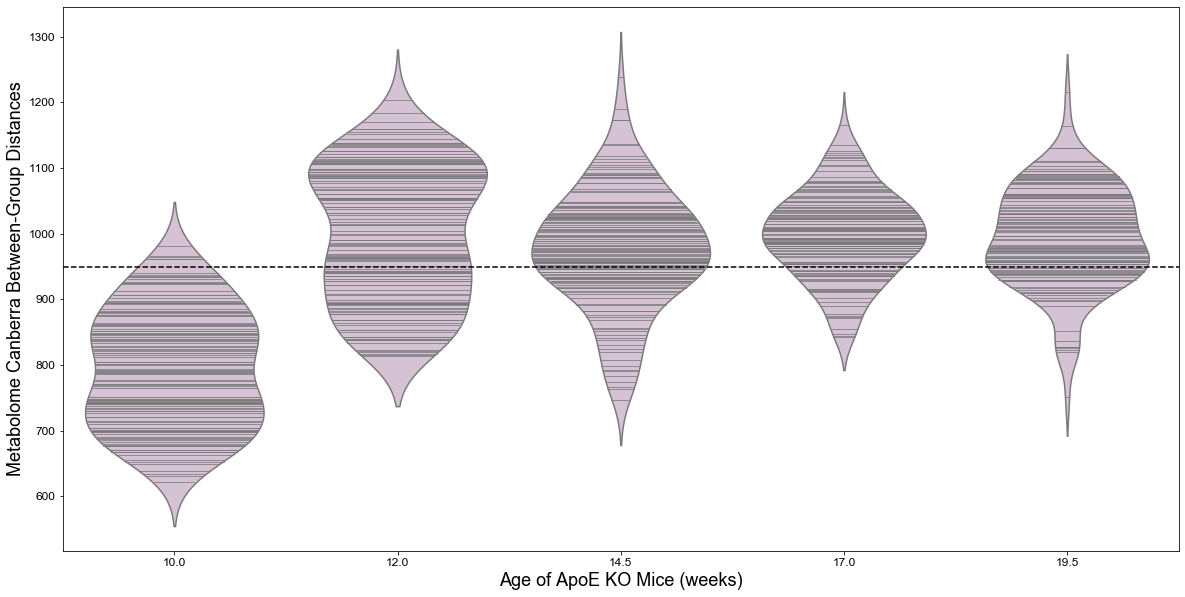

In [165]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="host_age", y="Value", data=l_wufdm4,
                    palette=["thistle"], split=True, scale="count", inner="stick", 
                    scale_hue=True, bw='scott')
    
plt.ylabel('Metabolome Canberra Between-Group Distances', size=18)
plt.xlabel('Age of ApoE KO Mice (weeks)', size=18)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(949.8267105712325, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_metab_canberra_dist_boxplot.svg', dpi=300, bbox_inches="tight")

In [166]:
some_values = ['10.0']
l_wufdm5 = l_wufdm4.loc[~l_wufdm4['host_age'].isin(some_values)]
l_wufdm5.head()

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint,mice,host_age,Controls,Experimentals
63,100_IHC_12.0,109_Air_12.0,967.443005,12.0_12.0,12.0,12.0,100_109,12.0,109,100
75,100_IHC_12.0,110_Air_12.0,1088.719441,12.0_12.0,12.0,12.0,100_110,12.0,110,100
80,100_IHC_12.0,111_Air_12.0,1060.488188,12.0_12.0,12.0,12.0,100_111,12.0,111,100
82,100_IHC_12.0,113_Air_12.0,1040.199243,12.0_12.0,12.0,12.0,100_113,12.0,113,100
87,100_IHC_12.0,112_Air_12.0,1135.330733,12.0_12.0,12.0,12.0,100_112,12.0,112,100


In [167]:
l_wufdm5.mean()

Value    990.615103
dtype: float64

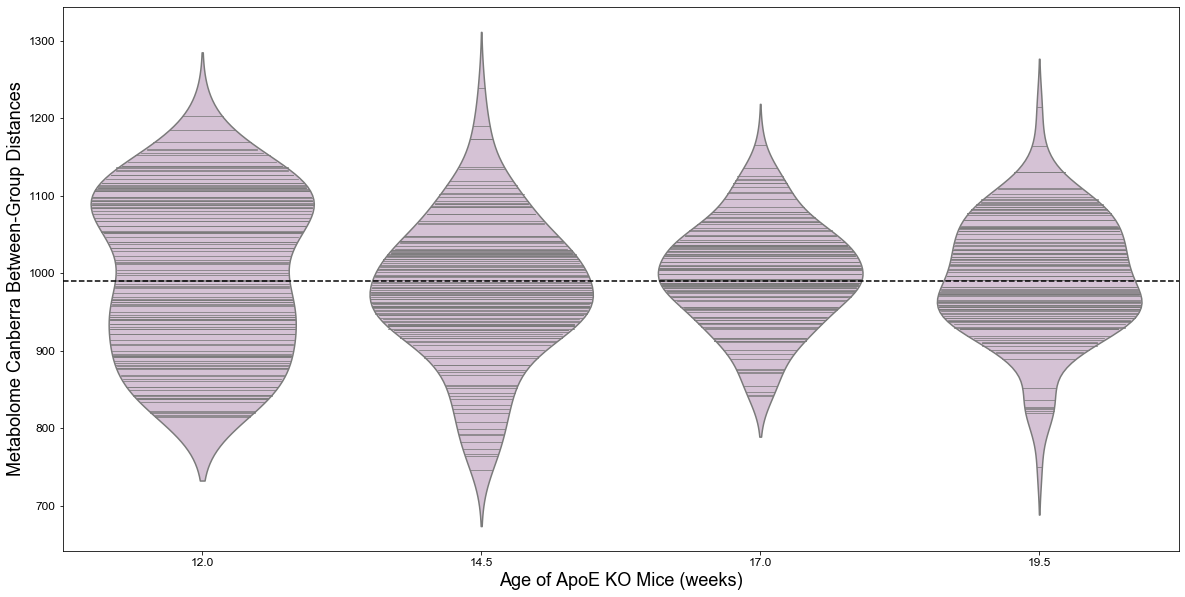

In [172]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="host_age", y="Value", data=l_wufdm5,
                    palette=["thistle"], split=True, scale="count", inner="stick", 
                    scale_hue=True, bw='silverman')
    
plt.ylabel('Metabolome Canberra Between-Group Distances', size=18)
plt.xlabel('Age of ApoE KO Mice (weeks)', size=18)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(990.615103, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_metab_canberra_dist_boxplot_drop10.svg', dpi=300, bbox_inches="tight")

In [169]:
tt = set(l_wufdm4[l_wufdm4["host_age"] == '12.0'].mice)
ww = set(l_wufdm4[l_wufdm4["host_age"] == '19.5'].mice)

q = list(tt.intersection(ww))
        
long_newdf = l_wufdm4.loc[l_wufdm4['mice'].isin(q)]
        
xxx = long_newdf[long_newdf["host_age"] == '12.0'].Value.values
yyy = long_newdf[long_newdf["host_age"] == '19.5'].Value.values
        
w, p = wilcoxon(xxx, yyy)

print("p-value", p)
print("statistic", w)

p-value 0.10982543495668953
statistic 3685.0


In [180]:
from scipy.stats import kruskal

z = l_wufdm4[l_wufdm4["host_age"] == '12.0'].Value.values
v = l_wufdm4[l_wufdm4["host_age"] == '19.5'].Value.values

w, p = kruskal(z, v)

print("p-value", p)
print("statistic", w)

p-value 0.5539903336611278
statistic 0.3502169711555325


In [ ]:
from scipy.stats import mannwhitneyu

z = l_wufdm4[l_wufdm4["host_age"] == '12.0'].Value.values
v = l_wufdm4[l_wufdm4["host_age"] == '19.5'].Value.values

w, p = mannwhitneyu(z, v)

print("p-value", p)
print("statistic", w)

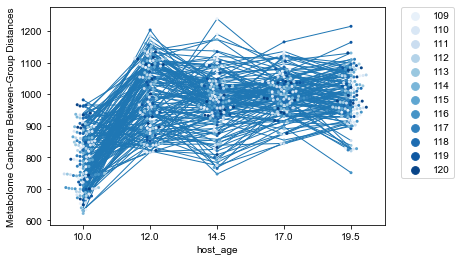

In [178]:
ax = sns.lineplot(x="host_age", y="Value", sort=False,
                  units="mice", lw=1, estimator=None,
                  data=l_wufdm4)
ax = sns.swarmplot(x="host_age", y="Value", hue="Controls", 
                   palette='Blues', size=3,
                   data=l_wufdm4)
plt.ylabel('Metabolome Canberra Between-Group Distances')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#spaghetti plot

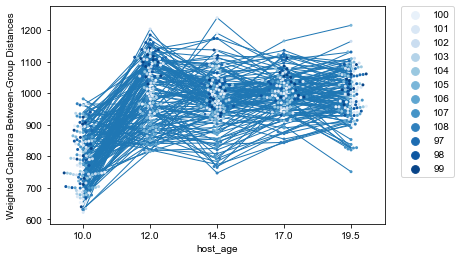

In [177]:
ax = sns.lineplot(x="host_age", y="Value", sort=False,
                  units="mice", lw=1, estimator=None,
                  data=l_wufdm4)
ax = sns.swarmplot(x="host_age", y="Value", hue="Experimentals", 
                   palette='Blues', size=3,
                   data=l_wufdm4)
plt.ylabel('Weighted Canberra Between-Group Distances')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)